#Предсказание аналитического вида нейросетевого обменно-корреляционного потенциала с помощью нейросети

Ссылка на источник используемой нейросети https://github.com/facebookresearch/symbolicregression

В данном ноутбуке решается задача символьной регрессии для предсказания аналитического вида известных уравнений для обменно-корреляционных потенциалов LDA, посчитанных с помощью пакета pyscf, - lda_x, lda_c_pw_mod, lda_c_chachiyo. Данные, с которыми мы работали, были сгенерированы в ноутбуке "Генерация известных потенциалов"


Установка окружения Conda

In [1]:
!wget -c https://repo.anaconda.com/archive/Anaconda3-2023.07-1-Linux-x86_64.sh
!chmod +x Anaconda3-2023.07-1-Linux-x86_64.sh
!bash ./Anaconda3-2023.07-1-Linux-x86_64.sh -b -f -p /usr/local

--2023-07-27 21:03:16--  https://repo.anaconda.com/archive/Anaconda3-2023.07-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1059513078 (1010M) [application/x-sh]
Saving to: ‘Anaconda3-2023.07-1-Linux-x86_64.sh’

Anaconda3-2023.07-1 100%[===================>]   1010M   123MB/s    in 7.7s    

2023-07-27 21:03:24 (131 MB/s) - ‘Anaconda3-2023.07-1-Linux-x86_64.sh’ saved [1059513078/1059513078]

PREFIX=/usr/local
Unpacking payload ...
                                                                                                   
Installing base environment...





Preparing transaction: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

Устанавливаем виртуальное окружение

In [2]:
!pip install --upgrade virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 36.0 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 2.5.2
    Uninstalling platformdirs-2.5.2:
      Successfully uninstalled platformdirs-2.5.2
  Attempting uninstall: filelock
    Found existing installation: filelock 3.9.0
    Uninstalling filelock-3.9.0:
      Successfully uninstalled filelock-3.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.


Создаем виртуальное окружение в Conda из .yml файла в репозитории проекта

In [3]:
!git clone https://github.com/facebookresearch/symbolicregression.git

!conda update conda -y -q
!source /usr/local/etc/profile.d/conda.sh
!conda init
!conda install -n root _license -y -q

!conda env create --name symbolic --file=/content/symbolicregression/environment.yml

Cloning into 'symbolicregression'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 46 (delta 2), reused 46 (delta 2), pack-reused 0
Receiving objects: 100% (46/46), 98.46 KiB | 4.28 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2023.7.22          |  py311h06a4308_0         154 KB
    conda-23.7.1               |  py311h06a4308_0         1.3 MB
    datashader-0.15.1          |  py311h06a4308_0        16.9 MB
    holoviews-1.17.0           |  py311h06a4308_0         5.1 MB
    nltk-3.8.1                 |  py311h06a4308_0         2.8 MB
    panel-1.1.1                |  py311h06a4308_0        14.6 

Проверяем, что окружение установилось

In [4]:
!conda env list

# conda environments:
#
base                     /usr/local
symbolic                 /usr/local/envs/symbolic



Активируем созданное окружение и проверяем версию Python

In [5]:
%%bash
source activate symbolic

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.6/site-packages')
print(sys.path)

print("Python version")
print(sys.version)

['', '/env/python', '/usr/local/envs/symbolic/lib/python37.zip', '/usr/local/envs/symbolic/lib/python3.7', '/usr/local/envs/symbolic/lib/python3.7/lib-dynload', '/usr/local/envs/symbolic/lib/python3.7/site-packages', '/usr/local/lib/python3.6/site-packages']
Python version
3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:21) 
[GCC 9.4.0]


Устанавливаем пакеты git и pip

In [6]:
!conda install -y git pip

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

Устанавливаем программный пакет sympytorch

In [7]:
!git clone https://github.com/pakamienny/sympytorch

%cd /content/sympytorch
!python setup.py install
%cd ../

Cloning into 'sympytorch'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 179 (delta 3), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (179/179), 36.76 KiB | 4.08 MiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/sympytorch
running install
/usr/local/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/site-packages/set

Переместим папки для корректного импорта модуля symbolicregression

In [8]:
%mv /content/symbolicregression /content/symbolicregression_0
%mv /content/symbolicregression_0/symbolicregression /content/symbolicregression

Наконец, запустим код</br>
Сначала импортируем необходимые модули

In [9]:
import torch
import scipy
import numpy as np
import pandas as pd
import sympy as sp
import os, sys
import symbolicregression
import requests
from IPython.display import display
from sympy import lambdify
from sympy.abc import a
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import random


torch.manual_seed(10)
np.random.seed(10)
random.seed(10)

Загрузим предобученную модель

In [10]:
model_path = "model.pt"
try:
    if not os.path.isfile(model_path):
        url = "https://dl.fbaipublicfiles.com/symbolicregression/model1.pt"
        r = requests.get(url, allow_redirects=True)
        open(model_path, 'wb').write(r.content)
    if not torch.cuda.is_available():
        model = torch.load(model_path, map_location=torch.device('cpu'))
    else:
        model = torch.load(model_path)
        model = model.cuda()
    print(model.device)
    print("Model successfully loaded!")

except Exception as e:
    print("ERROR: model not loaded! path was: {}".format(model_path))
    print(e)

cuda:0
Model successfully loaded!


Инициализируем нейросеть-трансформер

In [11]:
est = symbolicregression.model.SymbolicTransformerRegressor(
                        model=model,
                        max_input_points=100000,
                        n_trees_to_refine=100,
                        rescale=True
                        )

Сделаем функцию, которая на вход будет принимать таблицу с набором точек, а на выходе выводить вид выражения, а также качество предсказания символьной регрессии (для функций с одной переменной обменно-корреляционного потенциала LDA):

In [12]:
def symbolic_regression_one_variable(table, table_test):
  x = (table['x_0'].values.reshape(len(table), 1))
  y = table['y'].values.reshape(len(table), 1)
  est.fit(x,y)
  replace_ops = {"add": "+", "mul": "*", "sub": "-", "pow": "**", "inv": "1/"}
  model_str = est.retrieve_tree(with_infos=True)["relabed_predicted_tree"].infix()
  for op,replace_op in replace_ops.items():
      model_str = model_str.replace(op,replace_op)
  display(sp.parse_expr(model_str))
  print()

  expression = sp.parse_expr(model_str.replace('x_0', 'a'))

  f = lambdify(a, expression, "numpy")

  coefficient_of_dermination = r2_score(y, f(x))
  rmse = mean_squared_error(y, f(x))**0.5
  print(f'Coefficient of dermination train = {coefficient_of_dermination}')
  print(f'RMSE train = {rmse}')
  print()

  #test
  x_test = (table_test['x_0'].values.reshape(len(table_test), 1))
  y_test = table_test['y'].values.reshape(len(table_test), 1)

  rmse_test = mean_squared_error(y_test, f(x_test))
  coefficient_of_dermination_test = r2_score(y_test, f(x_test))
  print(f'Coefficient of dermination test = {coefficient_of_dermination_test}')
  print(f'RMSE test = {rmse_test}')

  plt.scatter(y, f(x), c='r', label='Train')
  plt.scatter(y_test, f(x_test), label='Test')
  plt.xlabel('True values')
  plt.ylabel('Predicted values')
  plt.legend()
  plt.show()

Эксперимент с "помощью" исходному трансформеру - берем степень 1/3 от значения исходного аргумента. Это сделано потому, что используемая нейросеть не может возводить числа в дробную степень (за исключением квадратного корня)

In [13]:
def symbolic_regression_one_variable_with_help(table, table_test):
  x = (table['x_0'].values.reshape(len(table), 1))**(1/3)
  y = table['y'].values.reshape(len(table), 1)
  est.fit(x,y)
  replace_ops = {"add": "+", "mul": "*", "sub": "-", "pow": "**", "inv": "1/"}
  model_str = est.retrieve_tree(with_infos=True)["relabed_predicted_tree"].infix()
  for op,replace_op in replace_ops.items():
      model_str = model_str.replace(op,replace_op)
  display(sp.parse_expr(model_str))
  print()

  expression = sp.parse_expr(model_str.replace('x_0', 'a'))

  f = lambdify(a, expression, "numpy")

  coefficient_of_dermination = r2_score(y, f(x))
  rmse = mean_squared_error(y, f(x))**0.5
  print(f'Coefficient of dermination train = {coefficient_of_dermination}')
  print(f'RMSE train = {rmse}')
  print()

  #test
  x_test = (table_test['x_0'].values.reshape(len(table_test), 1))**(1/3)
  y_test = table_test['y'].values.reshape(len(table_test), 1)

  rmse_test = mean_squared_error(y_test, f(x_test))
  coefficient_of_dermination_test = r2_score(y_test, f(x_test))
  print(f'Coefficient of dermination test = {coefficient_of_dermination_test}')
  print(f'RMSE test = {rmse_test}')

  plt.scatter(y, f(x), c='r', label='Train')
  plt.scatter(y_test, f(x_test), label='Test')
  plt.xlabel('True values')
  plt.ylabel('Predicted values')
  plt.legend()
  plt.show()

Приведем аналитический вид обменно-корреляционных функционалов, которые используются в данном исследовании

##1) **Chachiyo functional**

Аналитический вид выражения

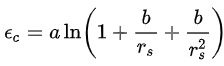

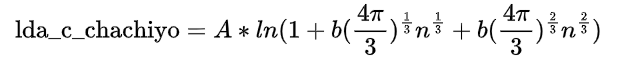

При подстановки констант и упрощении получаем следующее

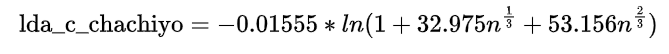

##2) **lda_x functional**

Аналитический вид выражения

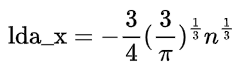

При подстановки констант и упрощении получаем следующее

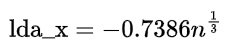

##3) **lda_c_pw_mod**

Аналитический вид выражения

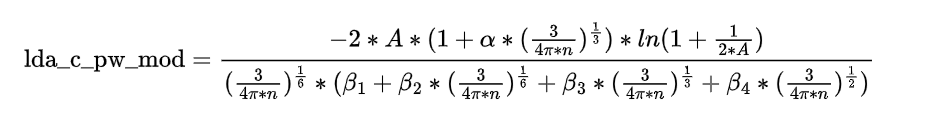

При подстановки констант и упрощении получаем следующее

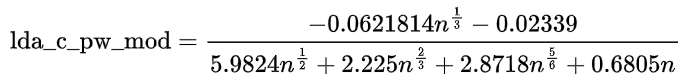

##Теперь приступим к экспериментам. Сначала исследуем небольшую область значений электронных плотностей (в электронах на бор в кубе)</br>
Интервалы для обучения: 0-200, 400-600, 800-1000</br>
Интервалы для теста: 200-400, 600-800

Проведем эксперимент с "помощью" модели (то есть с ручным возведением аргумента в степень 1/3). В качестве оценки эффективности модели мы использовали такие метрики как коэффициент детерминации и RMSE между значениями, полученными пакетом pyscf и значениями, полученными с помощью сгенерированной формулы


-0.0172*log(16.071131702086299*(-x_0 - 0.54987870353745425)**2 - 0.08020000000000001) - 0.00463


Coefficient of dermination train = 0.9755462483915928
RMSE train = 0.001764380867744803

Coefficient of dermination test = 0.8920625570370962
RMSE test = 2.2047119422530635e-06


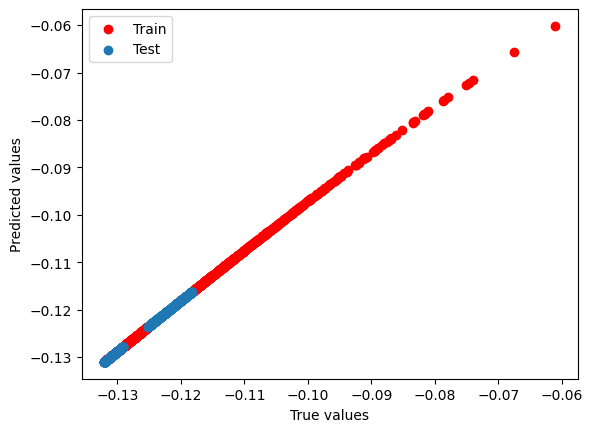

In [14]:
df = pd.read_csv(f'/content/lda_c_chachiyo_first.csv')
df_test = pd.read_csv(f'/content/lda_c_chachiyo_test_first.csv')

symbolic_regression_one_variable_with_help(df, df_test)

0.0027368415157811958 - 0.73869995621059249*x_0


Coefficient of dermination train = 0.9999986981231783
RMSE train = 0.0017693499146026336

Coefficient of dermination test = 0.9999962618800379
RMSE test = 2.724509735756573e-06


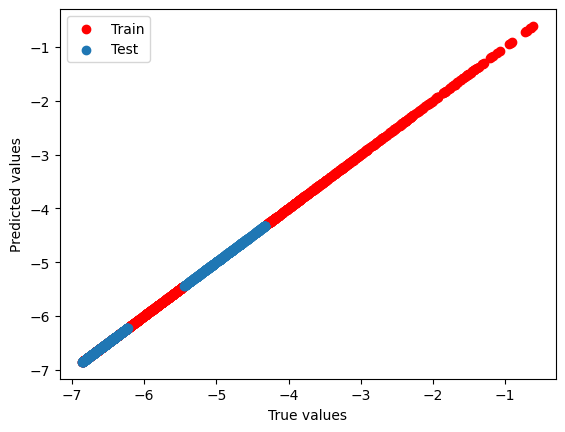

In [15]:
df = pd.read_csv(f'/content/lda_x_first.csv')
df_test = pd.read_csv(f'/content/lda_x_test_first.csv')

symbolic_regression_one_variable_with_help(df, df_test)

-0.169 - 1.9000000000000001/(-3.6516587632270631*x_0 - 15.826485472152127)


Coefficient of dermination train = 0.9773515125848015
RMSE train = 0.0016305136113044852

Coefficient of dermination test = 0.8819991366745761
RMSE test = 2.4042304658670903e-06


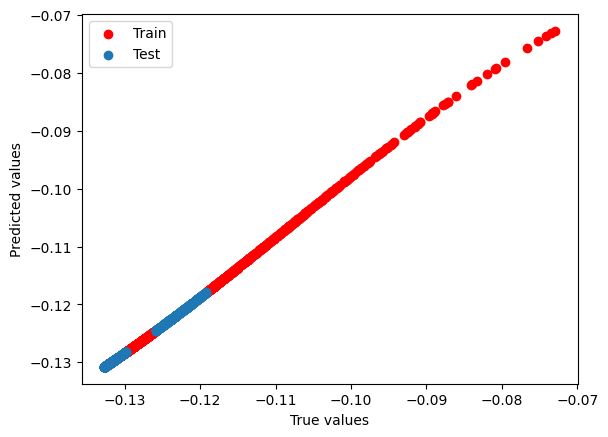

In [16]:
df = pd.read_csv(f'/content/lda_c_pw_mod_first.csv')
df_test = pd.read_csv(f'/content/lda_c_pw_mod_test_first.csv')

symbolic_regression_one_variable_with_help(df, df_test)

И эксперимент с абсолютным значением аргумента

0.12218805178903543*sqrt(0.31919745814143104*sqrt(-0.122072936660269 - 1/(-0.002100589496705768*x_0 - 0.069202265754429249)) + 1) - 0.265


Coefficient of dermination train = 0.9841860937230915
RMSE train = 0.0014188587795746345

Coefficient of dermination test = 0.9571692139572132
RMSE test = 8.74854386879183e-07


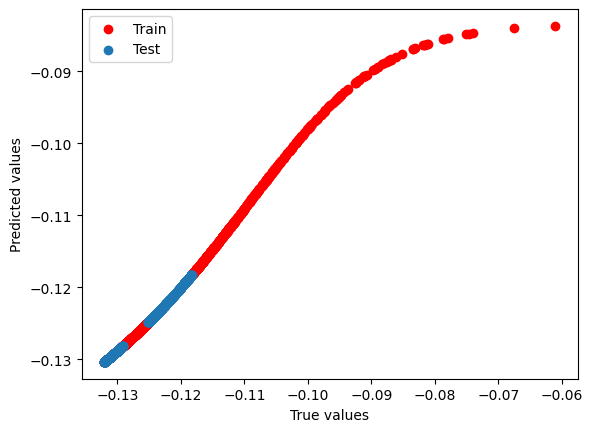

In [17]:
df = pd.read_csv(f'/content/lda_c_chachiyo_first.csv')
df_test = pd.read_csv(f'/content/lda_c_chachiyo_test_first.csv')

symbolic_regression_one_variable(df, df_test)

-4.9722092703771025*sqrt(sqrt(0.0079768648017948208*x_0 + 1) - 0.87537265503485987) - 0.0074399999999999996


Coefficient of dermination train = 0.9920496068913807
RMSE train = 0.13826844650383346

Coefficient of dermination test = 0.9933690594964183
RMSE test = 0.00483292728496534


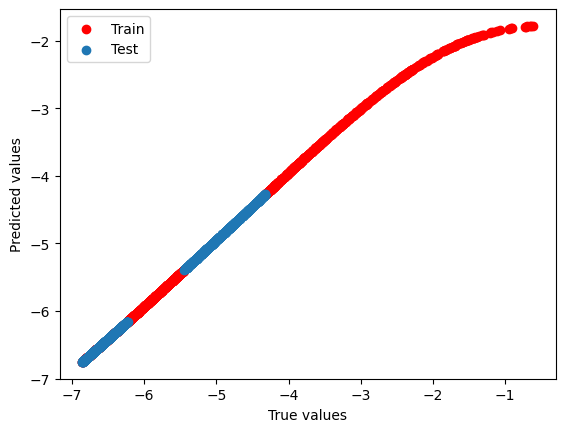

In [18]:
df = pd.read_csv(f'/content/lda_x_first.csv')
df_test = pd.read_csv(f'/content/lda_x_test_first.csv')

symbolic_regression_one_variable(df, df_test)

-0.003*log(1.414775906841228*(-(0.0405744809824267*x_0 + 1)**2 - 0.1953678297941737)**2 + 0.001) - 0.09000000000000001


Coefficient of dermination train = 0.9728688958482481
RMSE train = 0.0017845904370729349

Coefficient of dermination test = 0.9653091489124498
RMSE test = 7.068151767799544e-07


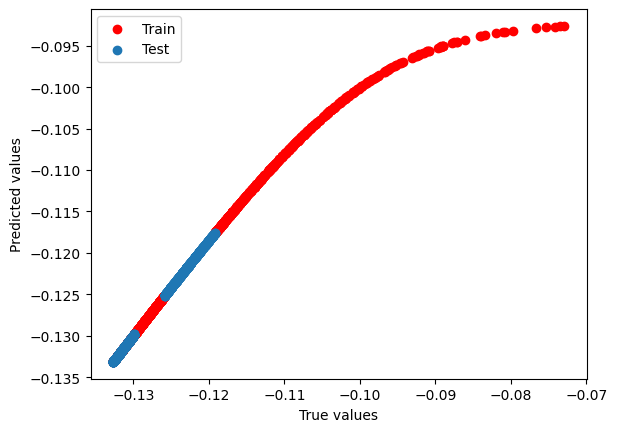

In [19]:
df = pd.read_csv(f'/content/lda_c_pw_mod_first.csv')
df_test = pd.read_csv(f'/content/lda_c_pw_mod_test_first.csv')

symbolic_regression_one_variable(df, df_test)

##Далее расширим исследуемую область начений электронных плотностей (в электронах на бор в кубе). В качестве верхней границы брали результат расчета электронной плотности для ртути (см. ноутбук "Генерация известных потенциалов")</br>
Интервалы для обучения: 0.1-10, 1000-100000</br>
Интервалы для теста: 0.001-0.1, 10-1000, 100000-1000000


Проведем эксперимент с "помощью" модели (то есть с ручным возведением аргумента в степень 1/3). В качестве оценки эффективности модели мы использовали такие метрики как коэффициент детерминации и RMSE между значениями, полученными пакетом pyscf и значениями, полученными с помощью сгенерированной формулы


(0.015599939132778209*x_0 + 0.00049057036841608872)*(5.2468503221898677e-5*(1 - 0.18556046220344172*x_0)**2 - 47.300000000000004)


Coefficient of dermination train = 0.9999970041728036
RMSE train = 0.01737226293753794

Coefficient of dermination test = 0.9999986770108311
RMSE test = 0.0007856343561878196


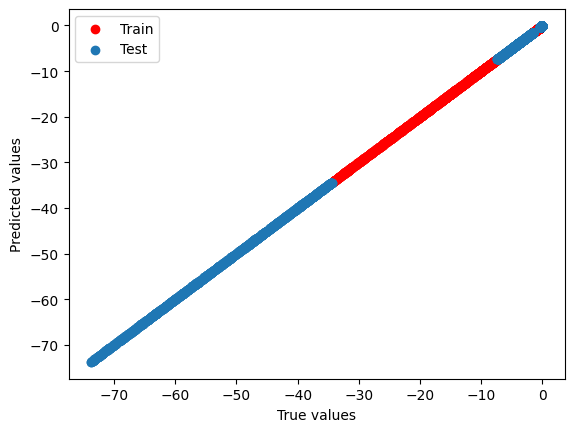

In [20]:
df = pd.read_csv(f'/content/lda_x_second.csv')
df_test = pd.read_csv(f'/content/lda_x_test_second.csv')

symbolic_regression_one_variable_with_help(df, df_test)

0.00502 - 0.054000000000000006*Abs(0.775*log(1.9090445761222352*x_0 + 2.4150678709498732) + 0.0007199999999999999)


Coefficient of dermination train = 0.9522482523762422
RMSE train = 0.010005924913956825

Coefficient of dermination test = 0.9770447389295799
RMSE test = 9.526987004657747e-05


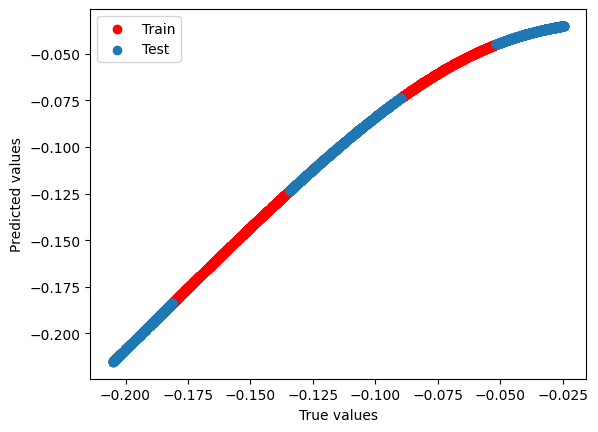

In [21]:
df = pd.read_csv(f'/content/lda_c_chachiyo_second.csv')
df_test = pd.read_csv(f'/content/lda_c_chachiyo_test_second.csv')

symbolic_regression_one_variable_with_help(df, df_test)

-0.0251*log((-2.75 + 0.0971/(0.001523476313758353*x_0 + 49.518792190197504 + 0.0519/(-0.0033399999999999997 + 7.25/(-0.02002283155225264*x_0 - 0.5775316425957847))))*(-57.9*Abs(0.021546307866010995*x_0 - 0.0019061672067100586) - 0.00466)) - 0.0383


Coefficient of dermination train = 0.9580840693024987
RMSE train = 0.009306226055267661

Coefficient of dermination test = 0.9122486095536521
RMSE test = 0.00035789206327925245


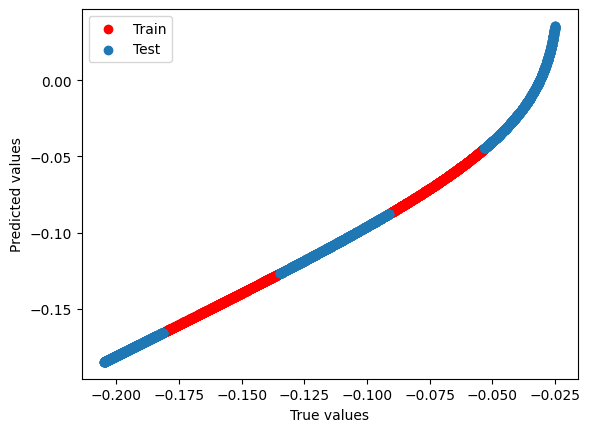

In [22]:
df = pd.read_csv(f'/content/lda_c_pw_mod_second.csv')
df_test = pd.read_csv(f'/content/lda_c_pw_mod_test_second.csv')

symbolic_regression_one_variable_with_help(df, df_test)

И эксперимент с абсолютным значением аргумента

-0.0002649286624989198*x_0 - 5.12*arctan(0.0007170301234592907*x_0 - 0.7249446313337505) - 6.3446977303708409


Coefficient of dermination train = 0.9596307134291822
RMSE train = 2.0166175930550696

Coefficient of dermination test = -3.1628691370359245
RMSE test = 2472.0482157687793


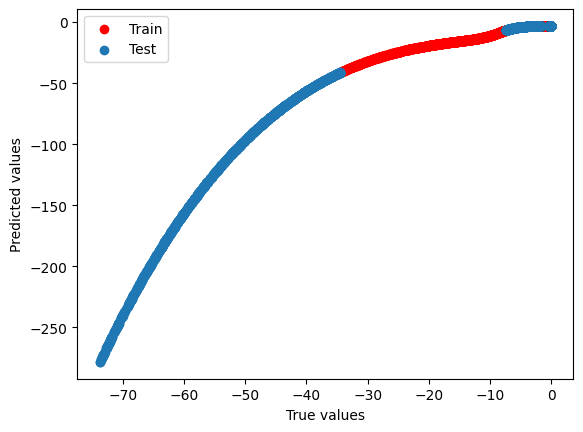

In [23]:
df = pd.read_csv(f'/content/lda_x_second.csv')
df_test = pd.read_csv(f'/content/lda_x_test_second.csv')

symbolic_regression_one_variable(df, df_test)

-1.711879601619755e-7*x_0 + 0.069*sin(2.29*cos(2.5654083043991823e-7*x_0 - 8.950000000000001*arctan(0.0046659086865669264*x_0 + 5.141181102693042) + 4.6371893703683) + 0.0342) - 0.10684448586606477


Coefficient of dermination train = 0.8562553348019951
RMSE train = 0.017360349816403463

Coefficient of dermination test = 0.6063346393457427
RMSE test = 0.0016338061952907996


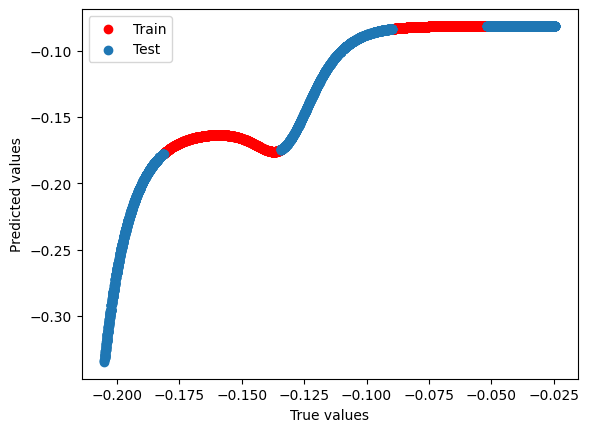

In [24]:
df = pd.read_csv(f'/content/lda_c_chachiyo_second.csv')
df_test = pd.read_csv(f'/content/lda_c_chachiyo_test_second.csv')

symbolic_regression_one_variable(df, df_test)

0.8639660674671698*sqrt(1 - 3.3351256287410943e-7*x_0) + 0.059000000000000004*arctan(-0.00090930172323835817*x_0 - 0.09000269950651618) - 0.93510000000000005


Coefficient of dermination train = 0.9593108454939956
RMSE train = 0.0091690295767234

Coefficient of dermination test = 0.6684742240976161
RMSE test = 0.001352120386519725


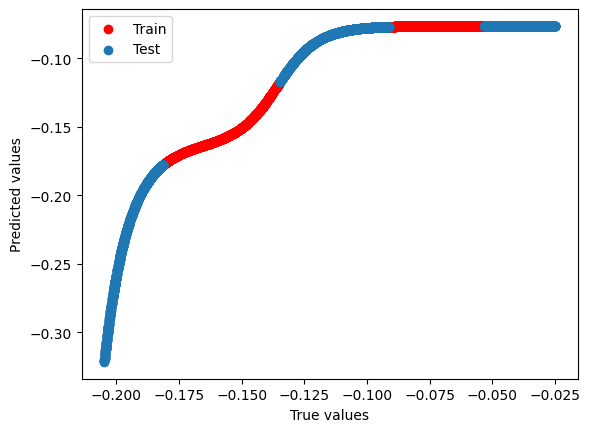

In [25]:
df = pd.read_csv(f'/content/lda_c_pw_mod_second.csv')
df_test = pd.read_csv(f'/content/lda_c_pw_mod_test_second.csv')

symbolic_regression_one_variable(df, df_test)